# Logistic Regression: Scikit-learn on the Iris dataset
M2U5 - Exercise 8

## What are we going to do?
- We will download the Iris dataset
- We will preprocess the dataset using Scikit-learn methods
- We will train a multiclass classification model using Scikit-learn

Remember to follow the instructions for the submission of assignments indicated in [Submission Instructions](https://github.com/Tokio-School/Machine-Learning-EN/blob/main/Submission_instructions.md).

## Instructions
We will now solve the same model using Scikit-learn methods.

You can use the following example as a reference for this exercise: [Logistic regression 3-class classifier](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html):

In [1]:
# TODO: Import all the necessary modules into this cell
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Load the Iris dataset

In [2]:
# TODO: Load the Iris dataset as X and Y arrays
# Check to see what format Y is encoded in

data = load_iris(as_frame=True)
df = data.frame
print(data.feature_names)
print(data.target_names)
print(type(data.target))
print(data.target)
print(np.unique(data.target))

X = data.data
Y = data.target


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
<class 'pandas.core.series.Series'>
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64
[0 1 2]


In [3]:
fig = px.scatter_3d(
    df,
    x='sepal length (cm)',
    y='sepal width (cm)',
    z='petal length (cm)',
    color='target',
    labels={'target': 'Species'},
    size_max=10,
    width=550,
    height=550)

fig.show()


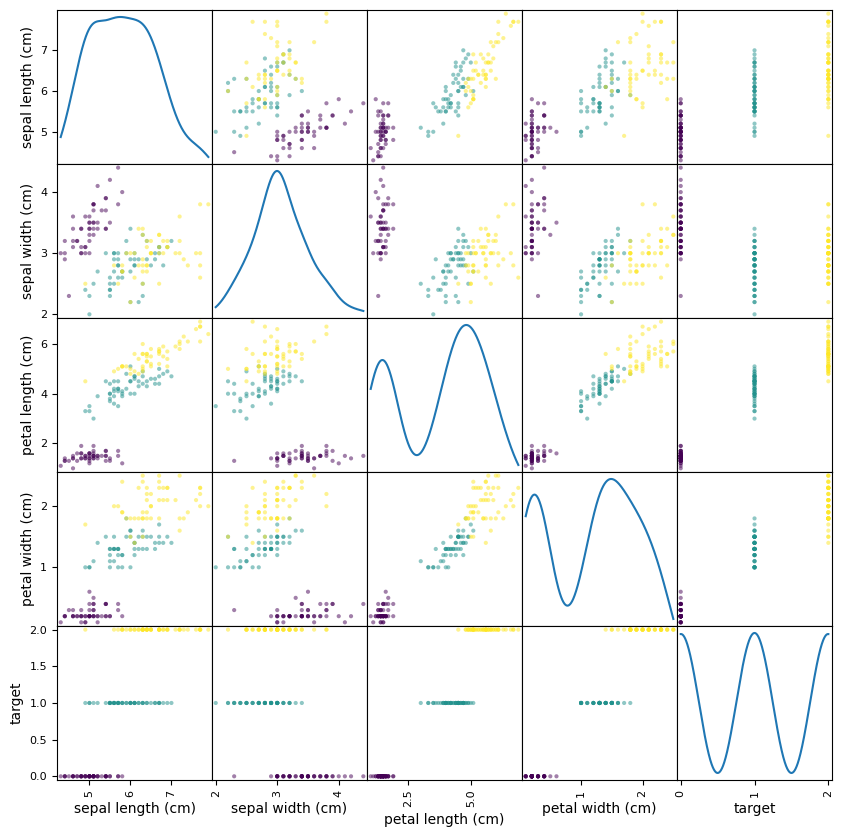

In [4]:
scatter_matrix(df, figsize=(10,10), diagonal='kde', c=Y, cmap='viridis')
plt.show()

## Preprocess the data

Preprocess the data using Scikit-learn methods, as you did in the Scikit-learn linear regression exercise:

- Randomly reorder the data.
- Normalise the data, if necessary.
- Divide the dataset into training and test subsets.

On this occasion, we will use K-fold cross-validation, as the dataset is very small (150 examples).

In [5]:
# TODO: Randomly reorder the data, normalise it only if necessary, and divide it into training and test subsets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

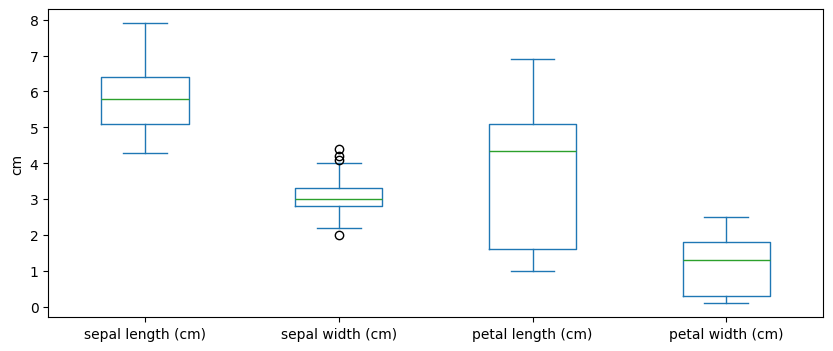

In [6]:
df.iloc[:, :-1].plot.box(figsize=(10,4), ylabel='cm')
plt.show()

Since the range of values of the different variables is not very large, we will not normalize the data.

## Train an initial model
- Train an initial model on the training subset without regularisation.
- Test the suitability of the model and retrain it if necessary.

The Scikit-learn function that you can use is [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) with an OvR scheme ("one-vs-rest", one class versus the rest).

Evaluate it on the test subset using its `model.score()`:

In [7]:
# TODO: Train your model on the unregularised training subset and evaluate it on the test subset
model = OneVsRestClassifier(LogisticRegression(penalty= None, solver='lbfgs', max_iter=1000))
model.fit(X_train, Y_train)


accuracy = model.score(X_test, Y_test)
print("Test set accuracy:", accuracy)

Test set accuracy: 1.0


## Find the optimal regularisation using cross-validation
- Train a model for each regularisation value to be considered.
- Train and evaluate them on a training subset fold using K-fold.
- Choose the optimal model and its regularisation.

The LogisticRegression method applies an L2 regularisation by default, although it uses the *C* parameter which represents the inverse of *lambda*. Therefore, the lower the values, the greater the regularisation:

In [8]:
# TODO: Train a different model for each C on a different K-fold

# Use the values of lambda that we considered in previous exercises
lambdas = [0., 1e-1, 1e1, 1e2, 1e3]
cs = [1/l if l != 0 else 1e12 for l in lambdas]

model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)

grid = GridSearchCV(
    estimator=model,
    param_grid={'C': cs},
    cv=5,
    scoring='accuracy')

grid.fit(X_train, Y_train)

best_model = grid.best_estimator_
print("Best C:", grid.best_params_['C'])
print("Best CV score:", grid.best_score_)
test_score = best_model.score(X_test, Y_test)
print("Test set accuracy:", test_score)

Best C: 1000000000000.0
Best CV score: 0.9733333333333334
Test set accuracy: 1.0


## Finally, evaluate the model on the test subset

- Display the coefficients and intercept of the best model.
- Evaluate the model on the test subset.
- Calculate the hits and misses on the test subset as in the linked example.

Intercept coefficients of the trained model
[  3.97232121  19.28078043 -23.25310164]
Mean accuracy: 1.00


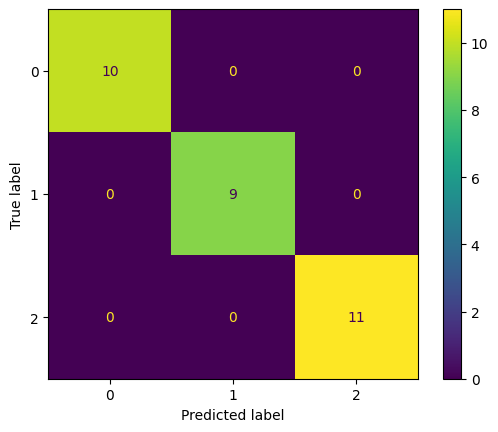

In [9]:
# TODO: Evaluate the best model on the initial test subset

# Display the coefficients and intercept of the best trained model
print('Intercept coefficients of the trained model')
print(best_model.intercept_)


# Make predictions on the test subset
y_test_pred = best_model.predict(X_test)

# Calculate the average ("accuracy") model evaluation metrics (its method score())
mean_accuracy = best_model.score(X_test, Y_test)

print('Mean accuracy: %.2f' % mean_accuracy)


log_cm = confusion_matrix(Y_test, y_test_pred, labels=best_model.classes_)

log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=best_model.classes_)
log_disp.plot(values_format='d')  # 'd' para enteros
plt.show()
